<center><img src='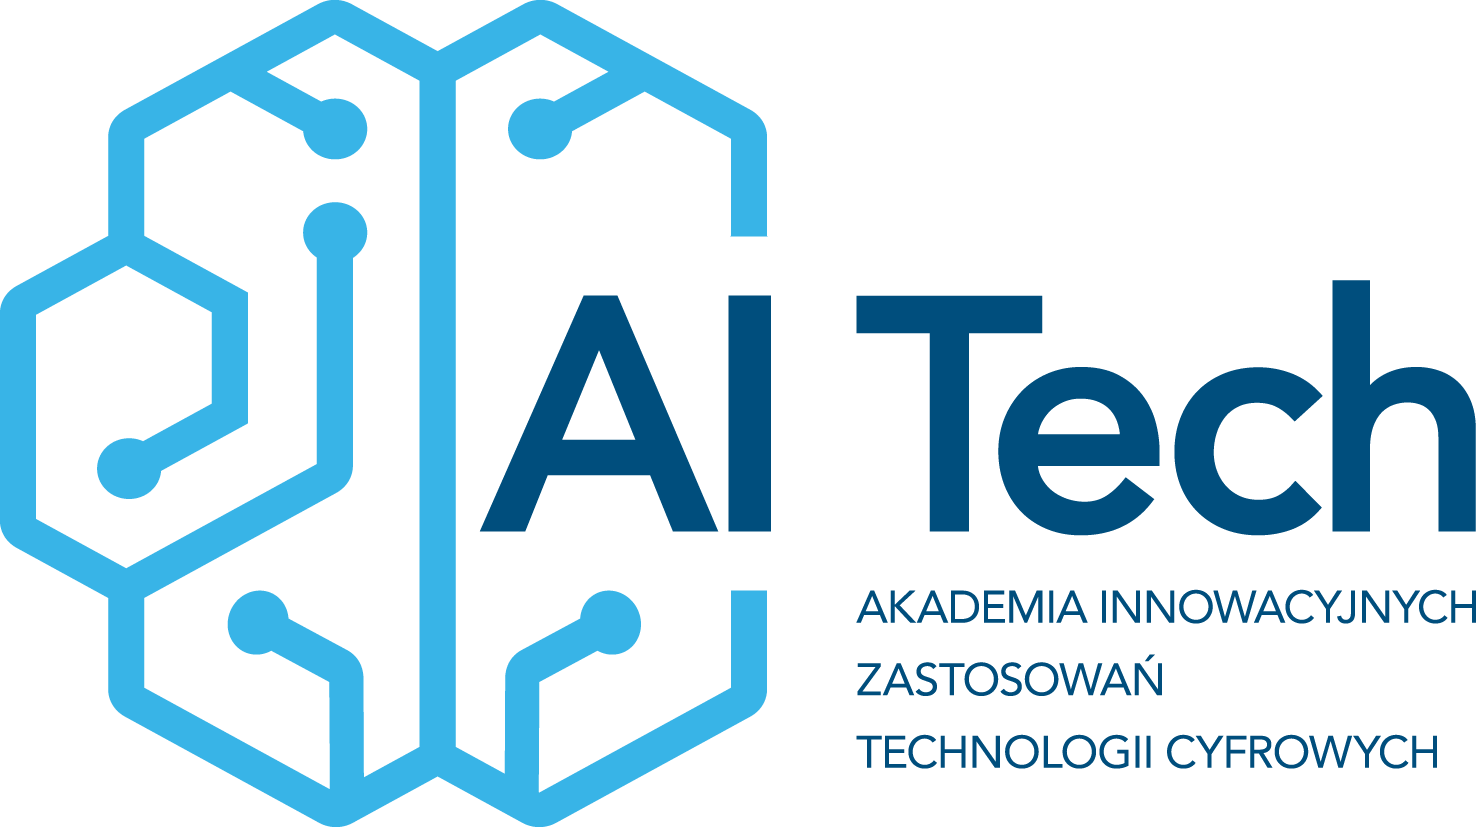
' height="60"></center>

AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Program Operacyjny Polska Cyfrowa na lata 2014-2020
<hr>

<center>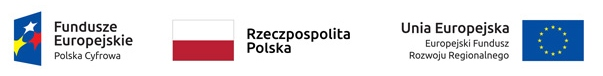</center>

<center>
Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego 
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej" 
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>

**Author: Tomasz Pawłowski**




# ML in big scale - LAB 12



Note: An amazing SVM tutorial is available at [link](http://www.adeveloperdiary.com/data-science/machine-learning/support-vector-machines-for-beginners-linear-svm/). If you are not familiar with `SVM` start with reading this tutorial.


## Pyspark installation

In [1]:
!pip install pyspark --quiet
!apt install openjdk-8-jdk-headless &> /dev/null
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

from pyspark.sql import SparkSession
spark = SparkSession.builder \
                    .master("local[*]") \
                    .appName("mlibs") \
                    .getOrCreate()

from pyspark import SparkContext
sc = spark.sparkContext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 14.0 MB/s eta 0:00:00


## Dataset 1


(21, 2)
(30, 2)


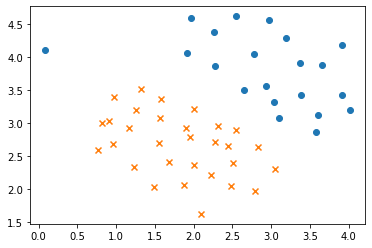

In [2]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import base64

with open("svm1.mat", "wb") as fh:
    fh.write(base64.decodebytes(b'TUFUTEFCIDUuMCBNQVQtZmlsZSwgUGxhdGZvcm06IEdMTlhBNjQsIENyZWF0ZWQgb246IFN1biBOb3YgMTMgMTQ6Mjg6NDMgMjAxMSAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAABSU0PAAAAGwMAAHicRVILUExhFL57d+8+2qu27eVV0iSNkmehsv9XGarxmjLZaNikmEXDlKSShiTs5Fmek5o0aIxHybO8zXhMih5EhJgek5BWVtp1r5r1/3PmzJk5853vfOezpChKI6QoMZel1EDmHzNYT+GC5kLAfTWXZVxM5Pojs6Y3PFxnIm/LM9NqptAorrzr4FYrwRtDurYiUYKN9DHpiHwWe+/p3aOsFHDJ2bhhxBA5xt7LOr041ArDEl4quwPE0CQtcLLXirAjraYsUm+BuN5P0YUNUjw0lqZ2XzSS5JRiz6CRNNQzLj9KUjHIC9qztjVVhuL5sIkOGmLGU21Wn/GuYlFb0WLrGCJFzNbGmZvVBnJr4tFxQ+0oOMd0LQlU/ecbqGprPJdCo8Vn+J2lBWKsf5b94p1Giiq/+c/3NwmRV8puOCcXYfKm8aNH9fSbcYyxPMEf5P7KEs2iMCPRfK5xeWP4RY7EK7ffefKLhDNFB3wFfcTvH2AvWaHgmXeRwlVlHQnl3WSJ/vrr3f3tpKe/Lrnd7SsZULuHjPknmJ7YdAdUx9ULULDr4of2XCGuZPLCiNGVRryX3aDQ58sBh4lw1qZm1qtvnYSfNi+zjfj98Y4scrpCTrcFe5milUicfeinuNkSze/lB88GKnFkrp0uVMuCpT122jeKcYlDL9XJkFhu1/c0Xg7tvB854ZcVyK2TrXbxVCDEyzS6P0mJjKvY9nGOFXShHaKp+6XoWRux5byPAq6HTfvSU63x4JJXfJGARUNE54SbY60H9bI04x69mbfP6rcU9dy2k7ItEMUboskCPv6VYXmFMlQwSlsyW4xTzbcsT5QxcPu0Pb+qRALJco4xy2Acv6iaRpRzwPeYuRQG7iDEqvpWrUcSBX0o70QanrHDPqoP0zhZVVJdHyEx8+W6c+t2MXj8mZxqVgnBmXZqxjRq0KcMXN3TddfXSODPnT3KKMGXfH/PuuFysz7WPFF7FtW94S3FxwXgmmUGZwYOwQv/DE0wkfu1HtxkA+Hp/HSQ4NoFYavOXYqM4NtbHK+JsOxGCEuvUeAvUZResA8AAAAqAAAAeJzjY2BgyABiNiDmgNIgwArlGwMxIxgzMlQCaSaYGBbAgBdApAF/ogGR'))
m = scipy.io.loadmat("svm1.mat")

X = np.array(m['X'])
y = np.reshape(np.array(m['y'], dtype=np.int8), len(m['y']))
print(X[y == 1].shape)
print(X[y == 0].shape)

plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1])
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='x')

## Example 1: SVM hard margin (local computation)

Linear clasification of a perfectly separated dataset is a process of finding a line such that all datapoints of first kind are on one side of the line and from the second kind on the other. Such line not always exist. If it does we can call the dataset `perfectly separated`. In SVM in addition to finding the separating line we do maximise the width around the line into which no points from the dataset fall.

Line equation is given as follows: 
$$h_{w,b}(x) = w_1 x_1 + w_2 x_2 + b$$

For hyperplanes (`lines in more than 2 dimensions`) we have equation:
$$h_{w,b}(x) = b + \sum_i w_i x_i = b + w^\top x$$

for such equation a point $x$ lies on the hyperplane when $h(x) = 0$, on one side of the line if $h(x) < 0$ and on the other if $h(x) > 0$

In SVM we are looking for a hyperplane parameters $w, b$ such that:

$$\begin{cases} h_{w,b}(x_i) < 0 \qquad \text{when} \qquad y_i = -1 \\   h_{w,b}(x_i) > 0 \qquad\text{when}\qquad y_i = +1 \end{cases}$$

Which can be simplified with:
$$
y_i(w^\top x_i + b) > 0
$$

Among the hyperplanes sasisfying this equations we look for the one with the largest margin (distance from the hyperplane to the neariest point in dataset). This distance is given by equation:

$$\underset{i}{min}\frac{1}{\|w\|}y_i(w^\top x_i + b)$$

Note that for all $c > 0$ equations $h_{w,b}$ and $h_{cw,cb}$ represent the same hyperplane.

For every $w,b$ setting $c=\frac{1}{\underset{i}{min}y_i(w^\top x_i + b)}$ and looking at hyperplane $h_{w^\prime,b^\prime}=h_{cw,cb}$ we just need to maximise:

$$\underset{i}{min}\frac{1}{\|cw\|}y_i(cw^\top x_i + cb) = \frac{1}{\|w^\prime\|}$$

Which can be achieved by minimising $\|w^\prime\|$ or $\|w^\prime\|^2$
 

In [3]:
# SVM is already implemented in python for running on single-machine in scikit learn project: https://scikit-learn.org/
!pip install scikit-learn --quiet

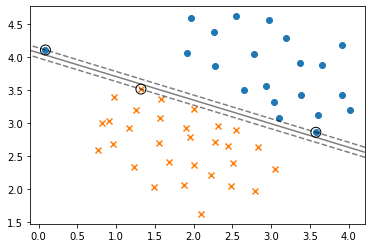

In [4]:
from sklearn import svm

clf = svm.SVC(kernel="linear", C=float('INF'))
clf.fit(X, y)

plt.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1])
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='x')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xlin = np.linspace(xlim[0], xlim[1], 30)
ylin = np.linspace(ylim[0], ylim[1], 30)
Y_grid, X_grid = np.meshgrid(ylin, xlin)
xy = np.vstack([X_grid.ravel(), Y_grid.ravel()]).T
P = clf.decision_function(xy).reshape(X_grid.shape)

ax.contour(X_grid, Y_grid, P, colors='k',
           levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

## Exercise 1: SVM soft margin

To handle cases when dataset is not perfectly separable an additional set of parameters should be added to the equations to allow violation of the margin or even the side of the hyperplane datapoints fall into. At the same time this parameters are added to the objective function to minimise the total size of violations.

$$
y_i(w^\top x_i + b) + \beta_i > 0
$$
$$
\beta_1 \geq 0
$$

Then the goal is to minimise:
$$ \|w\|^2 + C\sum \beta_i $$

where $C$ is a parameter specifying if we are more interrested in less violations (higher $C$ values) or allow more violations to get a clasifier more resistant to outliers.

In this exercise check how changing the parameter $C$ from `svm.SVC` in example 1 affects the result.

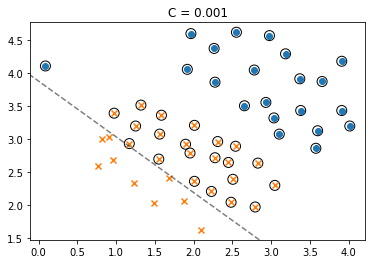

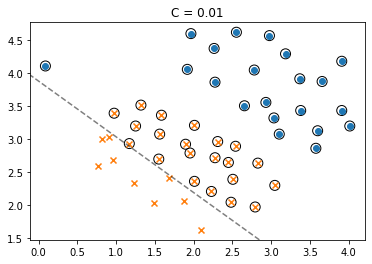

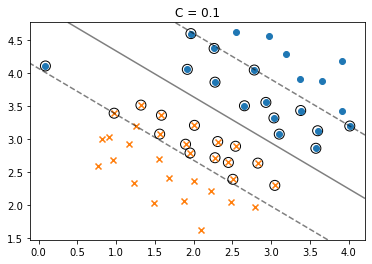

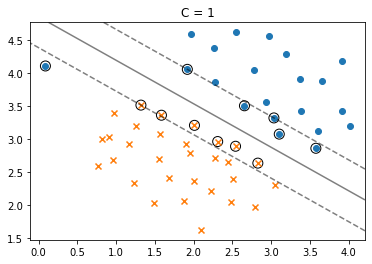

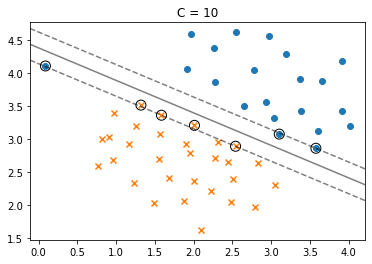

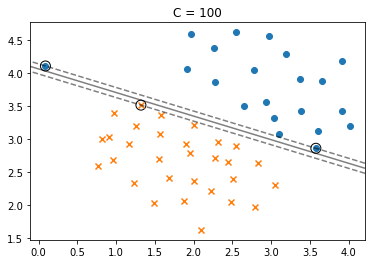

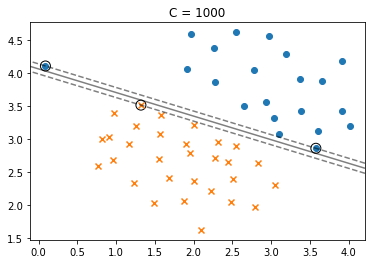

In [9]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
for C in C_values:
    svm_clf = svm.SVC(kernel="linear", C=C)
    svm_clf.fit(X, y)

    # Plot the decision boundary
    x0 = np.linspace(4, 8, 200)
    x1 = np.linspace(0, 5, 200)
    X0, X1 = np.meshgrid(x0, x1)
    X_new = np.c_[X0.ravel(), X1.ravel()]
    y_pred = svm_clf.predict(X_new).reshape(X0.shape)

    plt.scatter(
        svm_clf.support_vectors_[:, 0],
        svm_clf.support_vectors_[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1])
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker="x")

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xlin = np.linspace(xlim[0], xlim[1], 30)
    ylin = np.linspace(ylim[0], ylim[1], 30)
    Y_grid, X_grid = np.meshgrid(ylin, xlin)
    xy = np.vstack([X_grid.ravel(), Y_grid.ravel()]).T
    P = svm_clf.decision_function(xy).reshape(X_grid.shape)

    ax.contour(X_grid, Y_grid, P, colors="k",
                levels=[-1, 0, 1], alpha=0.5,
                linestyles=["--", "-", "--"])
    plt.title(f"C = {C}")
    plt.show()


## Example 2: SVM on spark

example data: [LabeledPoint(1.0, [1.9643,4.5957]), LabeledPoint(1.0, [2.2753,3.8589]), LabeledPoint(1.0, [2.9781,4.5651]), LabeledPoint(1.0, [2.932,3.5519]), LabeledPoint(1.0, [3.5772,2.856])]
weights: [0.617674061527105,0.6508343972464772]
intercept: -3.6343262291760574


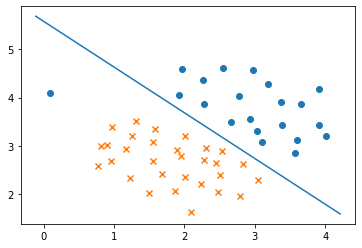

In [10]:
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.linalg import Vectors, VectorUDT

data = map(lambda label_features: LabeledPoint(int(label_features[0]), Vectors.dense(label_features[1])), zip(y, X))
rdd = sc.parallelize(data).cache()

print(f"example data: {rdd.take(5)}")
from pyspark.mllib.classification import SVMWithSGD 

lsvc = SVMWithSGD.train(rdd, iterations=400, intercept=True)

print(f"weights: {lsvc.weights}")
print(f"intercept: {lsvc.intercept}")

plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1])
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='x')
xlim = ax.get_xlim()
xlin = np.linspace(xlim[0], xlim[1], 30)
plt.plot(xlin, (-lsvc.intercept - xlin * lsvc.weights[0])/lsvc.weights[1])


In [11]:
print(lsvc.predict(rdd.map(lambda x: x.features)).collect())
print(rdd.map(lambda x: int(x.label)).collect())

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


## Dataset 2

(480, 2)
(383, 2)


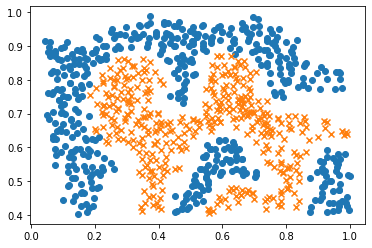

In [21]:
with open("svm2.mat", "wb") as fh:
    fh.write(base64.decodebytes(b'TUFUTEFCIDUuMCBNQVQtZmlsZSwgUGxhdGZvcm06IEdMTlhBNjQsIENyZWF0ZWQgb246IFN1biBOb3YgMTMgMTQ6Mjg6NTQgMjAxMSAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgIAABSU0PAAAA5RwAAHicdFkHWI3v+z8iMzMr2SPzi5bxDXeEjLKpyG7wRSIzo+wVSUZli6wklWQ2lJIT7ZxK43RWZ5W99T/9zvk873Xl+nO57uu87/M+z/3c43N/7lsLHo/XfRiP11AjG/O0svaPvu734vo8np5G1tP8ddTIJpp/1ZY8XlbGH+uHax5TDb/7mMiKBxTbVnE3qvVDGsB7Yb5C9pzWmzbMX/crnZZIrL4dqp9H20MCOwT7FlFu8LZJ30oqSM/t2Z6LI2S0mq84aDNMTvHBQYOT5ZWkPV1GqR8ivBOeyKizSaerZTdllOJX/aX7XhmV2dl1WPZZxtat/fhi8tJFMmpvnlS0p5WcyQT+5mrDRkK6wev45tLlUvLyXXKsa3wJLbK/EBUSUUxXfHYfaWdZRDGS1MXzc4vJ6Oj2Re/nlNFc81X9u6tKqepVsKrpjnw6Jl742XdrFsn5o3tvr8qgvu791FsCX9Ej94WhYutE6hnxdVPYwGhS+kt2jm4XQc1/GzqH33hIoa+LbZK+PqMol9odEsg9JPK3i18ijVweZBjz8iltXuHo9yj/EcGO09puHxxh94BcCxqFhrrdYxL2NQ2KHydJTybbV7u6/lf0gjzMbhlUeCTRQPNrnx80eELGrr/dlj1Kol4r+L3l+s9pr+tqmZtPMv023/Mt4Vg8O690r3TKzeoYpq++88RLkd5xbL9AnuX91XdSaOTZYzyP9ik0eeUw/+dLnrHzz9Qc3/nz39e0krd2V4OULLpsF/oypWMOycwvlfiF5NEpt48jDCR59MloxtqJGdl0wN5Foncmk+YF978T3yeTvC3yAr/bvqJVwQapH43SKfJV9UWPS2nEj+q7K2NkAV2I1t+b/7yQxYtl9Gm97D9vmcT75KBPX2dtKaQ1NelTAmcV0oOo8e7BE94R8W7anyt+Rx4J0gOtx5XRej8X/xnRZdQ/Q7KuI7+I+V9jnEvFsdw6C/u3O81elFEHt8vncwYJdecI6bPdENPTlUKdnUVkILl7/KGZmMa6uWdZtZPozhPTKEGG384YKYvTdKPDViUiCYkE4gXd5knpllv+LOtCKQUYjIy9cJmTiGetPSvpmmBUiz1bK+mIUblqbONKtl/36GjZ+abcdzgP55iENbv3I1RMISaryWi5iE6at9385CWnF/LNwveB9W6hjA742d7ce13Ozsdz5FumgbC+1U4xDUkY8+9GVyHN8PrQ09CznOqZlyZO71xGe8yOmnRYXsz8Av/XRmGr2wXk69aq29v3ReRnl3A3oHc5889UiWPJ3JZFOjsX0vWMEc1n7iugQW57HzTqkUvNjfxnNZmex9bDP+P4feYW2ZfQcKO5+9cNLyenhAYe7+wlDAd+rXd7PO5iJRU6fZqm7yynhX67NnaOl1Ck02Dj814SZpdLRsmNNv0SMnz4LkjbOHtKOcv/eW5TFGublDG8yDF/muwYVkT/mU+zmVMuoF52MwcfXczpizzQ2i+T5cfgmh6/v2zk08I/Nj9UijSyNj/YUvkthUJqYc7/Bf3iXR22bn0qy9N9QVNvxZ59QpP2zePfuR/L8v42/2R+aZsEln+ONdKhixclMPy5af71ePXTVJZHwBvgEPBplds/+ld/c3iC99FdlwdefhPJcAE4rrnklj6T5dTK+j/DvpsVDFdDvXYerrCupOnWhkufz66kOTw/98zMAoaX2bwSvSaHc+h/4RqXS7bSX21Td2UzOwEXgBu7a+64pE7MpfX2u/ivr+QziX3O+5ok7b+eTSWSo4FJTzKpPKrp2XqDs2iEncWkxNlZNDsj/JpvzBuGM1gHvD7ufmbtDscMXT5l0TSfL70muOQwPbCf9n7ZlMef33TSzxwKMvO0nuqQz+7lwG+8tuW4tzo8KGS/xwVPDDxims/iH783Gf3Jad62gARBBa0PrM5lddAlKq4mbUMe9QtpFJl2N4fdE+vwHt+XGq2Z20bwlsUfcO9W8P22x78UsHhEHiH/oAfyCbKbb67JNDVnZ3wnFFc6z5wioIO+NjdmRb+l/JqR/DMdilm+ok4CN5Vmv64b9yuhExlzP3YOeMfyXZtXnH44D+fgPfbV4hpXn5HvnrWA5l2mu3+Z7v7lDI+Qx9Xxp5RvD4ooe/2lA4WxYlpg8vz99v0SGqk5jWz+xlnE7zDJxuQexpwEjmA9cBv7vg7r5Xt2gpjVgzCDzpnZp8p1+FfGeMY/wcu3Oowupm8dw0fkzS+ikT6GTVt7CpisW58gf9KB7x92l1Pxh4CTnyKF1Nprct6mwArqY23/z4JVYqpyKlgxcoaI4ZrW/hIdX+H0ldDV0mfHpPQneOz2JalSxqOwDnypbUZ9R1FBpQ4XKqkoPir76kk5w88fBjeGh7pVsrqA+oF6wveZFL+ji5Ri7fZXfDcQ0zm/Ac/jznL4ClzVxkWFLn5ETO8JH3ntv28UMTtivZYXCHV2FDF/wj+ok9r8lVOO27n9N5IUdN/oeo9b1UrST9jSsPkOtY5PVNEru5W//6lXRdsN5p37746KCsyMjknNlfRVzN+0b4yC2QH147FBTWXDwwpqFp35emV7FXmHnen4aoOKIv2av1P6q3XxrGb7notvsq9xHLcfpItX3ihbFwUN/djlV/IuuY5vVjCprdsldMds9nyfqZlUYTG+3R+DDFYPUCdQF4DjO3mzzo54eJsul/fLHVzvOnsPfrcjY71Adu45tbZwa/N590v6dsfUZozNXTrU9fzikdJwtg/qAHDAx9x04cG8HIar2nvk6Oq3gOEP8K9RzAb9ooMcHiDfwauBQ8hr8Llf1ybsOPG4nPUB7gZeu4c9rGC8CnwKcQLeg3wGr2nq+96g0w8R2wd5Cf4GiXjS4pmI1X0tH6ygR4Ju/R6sqaDJviHzY/OFVOiX02ruFuFfeYg4hvwSpYqx7FnB7gN+BJlkNmxDNAl1OMetr7X25gEiljeI74YfHdKcgzm+ArxBXtWV4DPABeg/UxAZFnWjnNrxKowsPpWz++A5cAYS+Qqc2SbYVNgpQMz8AQmchV77nVZILY5wvBD7tWx+ZGbBfC7fUb8QD6ivkOivUAfxHHkB/oB1U6K3dm74MZsUNZ0lr5pxdQVxivNQZ8BPDUN6nz75WMDq0ZiMl0fsEvL+4i3vXYab/8h6zfjAZrt3pxYOLaUX8W/iPC+Vsb4Adm/SyfyQdyJnlwZHg8c/XSLR8TYZqy/X6WdAzygOZ13DYv6c9q1g8VWXZ6Pewa+IIxfrL95fbStYfCGe4WfgC+Lb1knTWUdw8QJ94Z+lRsaaFBAzWbfe4Dz4FfmK+EU+go/fi1deGBUuYXUIfWRmSDeflTOfU2LNvKjlvZIYfwWfDRjtN//2gfus70XfCl6K/hkS+6HfRV+J/dHH9hvdRRCWFM3w7zT/3pPbXWMZH47wH216eUQkw1Vj/8bbLY7cYucCT1P+RG37EJnO6izqEPAdeI86g/rzr/VQW//FVbTId8cGebpSNx9RkJ3RiEvXBnK8GnFyKLrnf1feyJhE34j5CPi4myAwQXJOQSZeg6puHVDp7qUm6fo9l1vcriKrMHX64KAqeiPQG6dYqtLlDTdnAZ6ij4VEXqPfQt+srb+ZVGS60WFTIp+mv55R/N4klc0H4Gf0OZgDoR9BH4P5Bfoj8PNnbg9Xb3j9klSuRStXjX/B/Ah/w4+oX9gXfQ+eY76C8zBXQbxg7oB+YGGn+OopJ3IpvMYraMiQMlaXwcvAT7tIh5UvCi5hsoWdR1unVe+YrPscvBh2DHadrnfWi5s/aflZKeO5+B7rwKdPBWf/WKBXQmZSo58njr5l9Rp4+lJya+uxtHyGh+hbIlzNOr9xf8sk+hXw+0mdivPbX+DmKKjvmKfgN/oC8Ff07eDR4E/IB8Qx5hfAu4sS0QSTMo5f4jck5hGIU/Aw8NMZYVmiZX4cjiI/gDM4DzLZxMxr11Quf8BbrbxaNindJmU4DdwC38AcBfhWl98CP4GvwGnwAPAQ4Dv4CfgH9kFdBX6C7wLvTU1+P217Qchwvu45iBvMLYw//is8frSMvYcErz4sqTfog6KMzW96+wytLt5Wyr5Dn4X1eI44zRA3tOkyr5TFM+pi3X4NfSLiGOsxz8F7fF/uM1Bwr3U5m+tAzxSn1pZZ7mVsvgH8rR98fkLVnDTdnCaN/XatZxi3cfhLNm8Bf8ZcFHih5f/Jf803UYfAv4FDWI95TUf+4h5erulsDgzeDtyBBG5hzoL6hPkE5qHo5xAP2vmRhM31MF8Bv0be4lzMP8CPMC8BvgKvgXuwJ+4RFuI0td7KN2w99sU8pe736CswX6nP396I1mUyvgZc/e7e8P2uLm/YOvAq6Aleh3kM5h+Yo2AejHuDf9TlPeDj4F+QWtyU0EZJ1zbPvkr+mpvC7lr9uL4D30GCD6HfQN8KiT4B+oAHo/9AHoO/YY4MHAEvA7/e6hU3b5ujmPUDWnxXM14BeddkupO9g5q9d3a6Es2/oqbezT1WNZuuYhL8IIsSUw6HqHT1WcX6V619q6iRyfDD4ffVrM8FnwB/eODjem1yfxUts/uxrf8olW6epdLNQZU63q74f/VD3wyJ99r/L+DWa5w7w6Pobx6D76An+v2694SeZ2vD2ofTC3069Mf9jws0BWlflS7Pqtj54G/QQ9svV5F8gWSDk10F5Z25dj7klYhEj/qL75+QEM9TKfAy0tSd3s5pveIUZNuli0OvxypKaWC5vZmCk9Wr/Us8u6nogirLWN1LSTMvilqcTZOThmReFI6Q08u5g3bOdlTQw6THzsmblbpzlLT+2gX9y0/ktHDmlMbz5lbSzfhFSxN3yCj6XpuP4VflZJxXaZ0/W0kKq/h+Y31U7Dt908z7Qy4p2P4HJ8cdt/VUsPerGwg3/tbT+EmsKaRj1EzPmABF2MkCJdWa2/KkgtxtaiuBgv0ea7BB1UzGSdPgAR1P5cop9wG/MipITs719nn/aCwncYhe8PkUGbWqv/Cn3g8p/Vhk4+k8UUruOa0TMpZJyGvf5ocHq0Q0qih0eLGtiHo0fPRF/1OF7r5C+vx0f1mcn5COeh+cuLlVBW2JtV0b5y+i4bdydoVfF5F+YkXRY03/HNND46FnUrp67NjtgHcyZiern+l7PrWV0+Z8j8eZtf8vUL5wsNBKSQ6RR7dEnVUyO4sHtI/vH66gCN9xo3c0UFCrQM8e/hpeotWL88PVP9779L+qdH5X07IrY5teSFJTaMT9rzdvqUnctGp961IV3Rwy1cryjIqafogOUJiomV+Cn9Rze7ZHSTukHfrIhijZ991PZ3Q+Uaim0kNOQ/Z/ULPvcF66pb6Z1RHOL4WaMp2+itP7f7Szn8YPW2sRWUUrehXY97+rYvpAP+d16+Z49Kyi5Ji16rsXOH9jPe6F9Sap57MTvdU6f/2tz6BJ5u3t3VV0bP5SjWtVOv9wdtX2DUoauGL+MlcLzq7Gn1sdVXeX0yOzG8NGBFTSTocGNQsmV1J6SkfH1HUyWlOriKWM3uz/pekE5Ww/nGv3p6/P1xZqGvhtzcH3nTj7rplzvb7TdE4ividmOLxM9VAzfRG32nxW0KH+AeOHhHL3v1G6745giprlMe6H8/t2WL6kS6qKfYfnyO/dN37yrsaqmYS+s3yeJu3+qdT2/YYqajZuazdbLy5esA/Og93HnjtgGPRazfTDfe4uMdaUVhWLA+Tnz9dDpmQuVjJ97KepDGYv4CSe/x8AAAD//2VYe1hN6RdGNzQkUoYicqmUFNEMWZUwch0y1SiXSJFL5JIo1yjElIgQiUjKNT9pKpKJiKJQnTpnn30u+1zDKIT8Mnuvbz9Pzj/r6Zy997fWu973XWs3vi59rGCKGvQcK3Idzqig8cAt2zi1EjJnrds7Y6kKhJ8mdWkxVEPTqYVJZ4r4OPbSix2XL6jh+N8dlxXuUkOH/z5qmOLqmT4uVgXDQ/4MDBqtgsNZvl8yriqhhjl5WuyihKIlEepgRwXkvBlh9taCAccuZu86a+XQZB9+xy5DDpPLfR6VrpaBtGvjOmOhFMJjNuXFNkogSm42hHGQgONx2z5HqsQksudK4OCfi1sWTJSCocfmAVPCpaAaV2Ttvk0Kkjs20txEGURtGj5tvakcnjUz3T4YM2D3evL4mhkMSFM6HT/1gI+m537en3FDDfGRsZM39VBBnlh8UeCphDtOF8e4JCigh07A504tcjAMPBO60E1FcHs0zy56ri+PH9bdVLBHdPuAEm52fL2981sFRAwdPdUuU/HDdZters6v8FfC2L5351veU0CHMHVN+M8KOG6nBadTfOzX1CNea6kEUxP9oL7lCvDYuqh0W0cF7IqturlfwYDy8fOZ5UEM9Av6uizwVzmU3FyjvZIqg4vCmOwaLxlMsbDwscqXwrNl1fIVw6VweL/j1YO0BHyuxkdcPyHh+i3h+k9D1f+eKK4fE4OvZeScobkUBO7sWxjTJIKQG8rw3CMiKEn67WxypQjGfS7b9d5EzNUjhsCeIyTGAhrsfhtlOiNYCvrGmcvNXkghb86znbMXyKHsQR/f0rUMVBskbuouVRCce5e4vSrcroRjAuvrL2fzuKcGFDYtdlVw5zKQWbRg8b0oBs4dPJiVUM8QfPB6Nk+G8Gr4x1Wxb/vKSN15xfn+JZskkN7/bKVFCQ3BE1uPu2+lub6IufPFXB8o7nyK/J6qqeyntZJwepBAnE2Cp0O6FIaWnnp+L1JG+oDnz5ip+Wnu/Lbfx+677JxEw/TVJn6h1jRIbU2LbC7TEEAFjBCPk0B18vlTKY8l8GbloYawAVJyX6bDtHHOyVJyTvs6Sgb7P7S6TcPvpyXdTzwUQ3O3thNqKI4XIg4nEccbClatfzprrTkNEbemrLl9SEKeV+as5zRuvxSUqk8pUieeN8ijru9uJKiGykg+qE/kEfY7tubxrRd/yAgemDfy4IGu81ZDFa/PnRc/dzh3SwaWR8vNE2tlEHjWvWtqMe8DeD3qfM62guKdnyUEt9ipt/+aEkZDznYP1yhdGm5c6/nv5XM8b8dP+8t49mKK8x8KPk8wH+y5mYIxZS3lJevFsO58ql7a37yfsL7G14V+cq41Mkbvw48R8WD796M/snmqoejf/T3fm6nh81MHr4qFag5/NRiHT63e2EsDq7wv6PjN0oDjZp0nWw00xFfZ/Hles7pjQD/t70Ppebx/oR7QZ9j6ef9A30B/Y3nD+zXLHyWHC69DjKhT9HPUpWi5E71qSJs/Hg4beEikJM9jdaclcZjZkkUWpRrO57UEL8QJ5wfm1a9a4fZyblv93Jxi+6+BK4v6vV06VkP8uv11LJ/531m9qjmdqwjPELd1vfcLTV7KCW9RB8jv2ocb5paF8jpj/Z4G/44xkS2dxURn7FwREV2hHtB3ke/oC/5r13qvHiQn399MUGUkveL5h/p/1EY14QReF3hf4a7TLttbZbBSV7zhayfe39CX0K/YftNcX2hw/2m9xpChiU+jblAP7JwRQ9Jni32dvlLET9j5REGtS6D9hBiK6zsFAzdmVGzu9qPfYMS5gRG/j807tyI/TgSGzw9MeuEnIs9DXH0qbpaUhfDzHnWOfdjVh6k1q6B/0H/A716d/5hHcfrgnz+9ocMooTt/Lv7O8kBE6saI+eD1iAerAzE3r3h8MbL6lxAfRf+s9Y3b/MccObif3Nvr2FMZVA3Luz/0upzsQ6u+E8GZgZsDvz2xLJSDMM7PYc87vr+sP0gJT9Cf2s8vxA9xQP8j86d12LYP3WUQMXn+Ec+NcrLX4FxF3oVYvZphc4X3Ocwb68B5jnsbqz8J5z/83ER+4P6CfoH1tok6zH8yz2fkN+aHe1v7uc/6uIKrV8nxRUm+x+tRb4f7TXrZt0xO8EX88flsngrir0MvbNyTmc3AQeV6S5UNv6/ifahb9H/co1ieKLg5qyJ1o+/iHEC/Q7+N9tH9Nn8qvyeyvGUI7tgn9CfcQ5B3uL8N1L/TrPeeJnMT80U80MdxT0F/Qd9oP0dx7rePyCOsH+9n55uE5Ic+g/igr2IdmCfyDJ+Pc7f93srORynxZYys30vI9fh8dr7y+5nePbouf4+M7Mmmo+2vOaXIf6gHdYd8RD3jfoh7BPoaq0MhXK+KLKo8SMHU4EWSoHLexybtMhkf409Bz4IDgXlDxOC0sXhamJKGdf8tWjS8csy57WJLgbnHkRTX2SIYkbgx/dBm3l8U0TPdo8eIYfW9OQF3p1HkHPM2WnutosD6bV4vdVEbXtkjo66kMZzeVbD4QebL4ssabp/SwFz/ec0BxlrQSS5NSXBXwacdWeN3jFTC+kAjzRI9JXzJKo3K2qCA1mq6sPoOA16eH83caTmJ745mDTixlIG7FVaTn9krwED1zVz2WAH5W1X3I9OV0HFVll/wFxVXjwZyW492+PJCDacveehcW8mfh8+/LbWyUSyWw618A6bQnIHiFtj7aR0D2RmquBxDIdhcC92SP6QBViY1nYhTCGDqq+mFNbI6+Id6ckXWoQ5ylnzvUC2sZez7N4TXwWtDvZUGVvXgmz394/loIVyy65pvHSmC16l+Pc8MpeCv3VHj4mJFwDiWjXIwaHufcSv42XlhA5Q/+f4RwCWjwY3mZXUQlNkUnW5RB3fOJvW4fKkWZAY573SLRaBydrW2niTk3o8aYJ5pTICJqwCc/ATblv7K54Xfv4nbcGnrs3oYeTL0WNpbIcdTEcyel7bD9xYFwS+M75YHisFvRYEwpLRNb0GUKjRABE/jXG8e6i0C5zfpfZu3NJD6MB/W9xpA4uXa9upbT/JHnBbPK/gy87AAcmf6H/SxFIC93rmvRlf5fDDOLp5eV3S9nuMnHxFHReqG+KM6AoKH5l22kSq+luSBdeLzsV+ID0bEuX3EfOsXumrnZ/P93DB+2Rmn1hqCG/aN9RURtwcIOf4ICU4PI5K8IjwauPcsIeER1nutxeonnaN8nYhPe16x/eDrxPoQZ+QB4oT3f3KU5QyR1JI6qBsbwq6OreVx5XiYvCbKd423mPyNdWL/T97Prb3fIIKR0zO6Tj4vgiXq3cmiKiGkBX9/Eeb5WmmpN2ugTx14qKen/du3FsZkm3TKK6khfcH+YsS8B3dbHWo4SwQFv/hnuarrCf7IY6wDz0P8B9G/21JdKHiycGB4UIWI4Is43ItPsk/cKABRs26cRttA6kO+nzHT+vdZ3sjNmUbOpxrh+3rrkaOF5pT+JklnG6HBPKe6f7MWjrzOLajv2QiT3hQdUfsq4GzVAs+6a0pY0/3VCqMtKhhS1jDnabKK+NdjI39pl90KePpL2yR9xMCeASdnWQxn4Hn81Yuxc+UcL+QcL2UcX2RgEO19P/qZlKtDCl9DXIJWF0pgrjrEXPlBwvm+DDrZmrvbTpLDguFp+YNnSiHhrfWRN7sl3LyWcHsGDd2+XNzzNZWGb4neGcd0JCSyONPc/KFhn75NRNc8MTevKAgd5uUxSNOGa69kundnFdj2N6seNEgJLntDc/cWKGDiP+nexb34v7v0Nl/Qw1jB8UcOH5R0WqNWxulBBhP07kbox8uh+3Jv0dITckhcUKX12cFweyTD7XkKbg9QcvuGkpyPfm39vuXwRwEfEWf08dJ8qyW5n5SwZYZRV6/Ktrlzfue+S0IV+Rv9H+/H/PH7q643BrvNUIKu/IC1Jl7M7b9iohNWR2JIOf79Q3H/T/gxIn7o+6gr9An83n7Qvkf9FvHX4zxA33BzEOSNfN5AfON9fbZdpZ+A+APqDSPqfebwGLcRa2uJjnCeYESfQP9GH/zFU3DSS5/3EdQb1nX+daVLVSOvuyEBoz4tOyEk96HuvDNrdLLdeP+40Em7uXU0xb2Hiwm++Hz0S/RBzBt9/v8NnMS0DwAAAD8AAAB4nONjYGCYwMzAwAakORggNAiwQvnxQDlGBhBmZKgE0kwwsaEOGAYeUN/ddA4DCkymr0MpT650tp0BAIEaA+U='))
m = scipy.io.loadmat("svm2.mat")

X = np.array(m['X'])
y = np.reshape(np.array(m['y'], dtype=np.int8), len(m['y']))
print(X[y == 1].shape)
print(X[y == 0].shape)

plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1])
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='x')

## Exercise 2: Nonlinear kernel



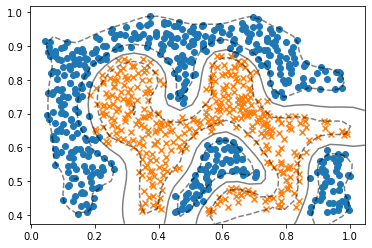

In [37]:
from sklearn import svm
from math import exp
from numpy.linalg import norm

SIGMA=0.05

def gaussian_kernel(x, a):
  return np.exp(-np.linalg.norm(x[:, np.newaxis] - a, axis=2)**2 / (2 * SIGMA**2))

clf = svm.SVC(kernel=gaussian_kernel, C=1)
clf.fit(X, y)

plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1])
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='x')

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xlin = np.linspace(xlim[0], xlim[1], 30)
ylin = np.linspace(ylim[0], ylim[1], 30)
Y_grid, X_grid = np.meshgrid(ylin, xlin)
xy = np.vstack([X_grid.ravel(), Y_grid.ravel()]).T
P = clf.decision_function(xy).reshape(X_grid.shape)

ax.contour(X_grid, Y_grid, P, colors='k',
           levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

## Homework: Gaussian kernel on spark

Transform the feature vector using the Gaussian Radial Basis Function:
$$ f(x) = (f_1(x), f_2(x), \dots f_n(x)) $$
$$
f_i(x) = exp(-\frac{\|x-x_i\|^2}{2\sigma^2})
$$

Try multiple values of $\sigma$ and $C$.

And run `SVMWithSGD` with such transformed features to get results similar to non-distributed implementation from exercise 2.


In [40]:
from pyspark.mllib.regression import LabeledPoint
from pyspark.mllib.classification import SVMWithSGD
from pyspark.mllib.linalg import Vectors

# Transform the feature vector using the Gaussian Radial Basis Function
def transform_features(x, x_i, sigma):
    return np.exp(-np.power(np.linalg.norm(x - x_i), 2) / (2 * np.power(sigma, 2)))

# Create RDD of LabeledPoint objects
rdd = sc.parallelize(zip(X, y))
rdd = rdd.map(lambda x: LabeledPoint(x[1], Vectors.dense(x[0])))

# Try multiple values of sigma and C
sigma_values = [0.05, 0.1, 0.2, 0.4, 0.5] # a list of sigma values to try
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000] # a list of C values to try

for sigma in sigma_values:
    for C in C_values:
        # Transform the feature vectors
        transformed_rdd = rdd.map(lambda x: LabeledPoint(x.label, [transform_features(x.features, x_i, sigma) for x_i in x.features]))

        # Train the SVM model
        model = SVMWithSGD.train(transformed_rdd, iterations=100, step=0.1, regParam=C)

        labelsAndPreds = transformed_rdd.map(lambda p: (p.label, model.predict(p.features)))
        trainErr = labelsAndPreds.filter(lambda x: x[0] != x[1]).count() / float(transformed_rdd.count())
        print("Training Error with sigma = " + str(sigma) + " and C = " + str(C) + ": " + str(trainErr))

Training Error with sigma = 0.05 and C = 0.001: 0.44380069524913096
Training Error with sigma = 0.05 and C = 0.01: 0.44380069524913096
Training Error with sigma = 0.05 and C = 0.1: 0.44380069524913096
Training Error with sigma = 0.05 and C = 1: 0.44380069524913096
Training Error with sigma = 0.05 and C = 10: 0.44380069524913096
Training Error with sigma = 0.05 and C = 100: 0.44380069524913096
Training Error with sigma = 0.05 and C = 1000: 0.5561993047508691
Training Error with sigma = 0.1 and C = 0.001: 0.44380069524913096
Training Error with sigma = 0.1 and C = 0.01: 0.44380069524913096
Training Error with sigma = 0.1 and C = 0.1: 0.44380069524913096
Training Error with sigma = 0.1 and C = 1: 0.44380069524913096
Training Error with sigma = 0.1 and C = 10: 0.44380069524913096
Training Error with sigma = 0.1 and C = 100: 0.44380069524913096
Training Error with sigma = 0.1 and C = 1000: 0.5561993047508691
Training Error with sigma = 0.2 and C = 0.001: 0.5561993047508691
Training Error wi

<center>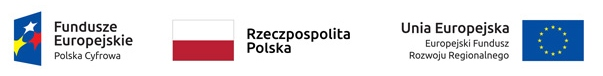</center>